A1.6 Regresión no lineal

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

1. Se guarda en la variable data los datos del archivo csv "A1.6 Tiempo de Entrega". Es necesario hacer una conversión de los valores de la columna Calificacion, dado a que algunas entradas en el archivo original no son completamente numéricos al poner strings o signos especiales.

      Tiempo Calificacion
0  85.076389           85
1  84.675556           85
2  79.553889          110
3  75.310556          110
4  64.958611          110
5  58.157778          110
6  56.238611          110
7  55.903056          110
8  52.465556          103
9  51.998333           96
      Tiempo  Calificacion
29  4960.167         110.0


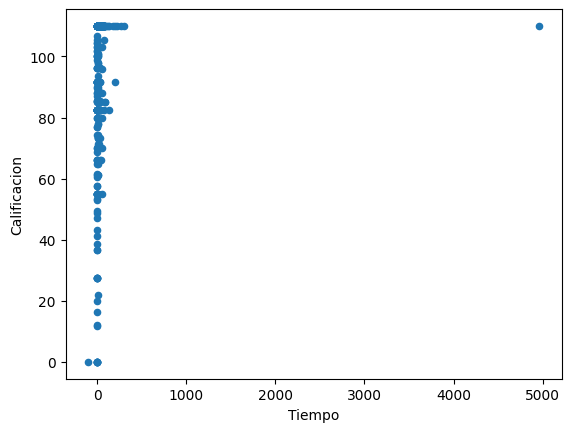

In [9]:
data = pd.read_csv("A1.6 Tiempo de Entrega.csv")
print(data.head(10))

data["Calificacion"] = pd.to_numeric(data["Calificacion"], errors='coerce')

print(data[data["Tiempo"] > 4000])
data.plot.scatter(x="Tiempo",y="Calificacion")
plt.show()

Se pudiera usar un algoritmo polinomial, ya sea cuadrático o cúbico, que logre capturar la tendencia de las calificaciones a aumentar entre más tiempo haya entre la fecha de entrega y la entrega del alumno de forma curveada y llegando a un máximo cuando la diferencia de tiempo es muy grande.

2. Se separan los datos de entrenamiento y de prueba en 70/30. Para los datos de entrenamiento y de prueba se imprimirán los valores promedios de calificación y tiepmo para la comparación de los dos grupos.

In [10]:
X = data["Tiempo"]
Y = data["Calificacion"]
X_train, Y_train, X_test, Y_test = train_test_split(X,Y,test_size=.30)

print("Tiempo promedio de X_train: ", X_train.mean())
print("Calificacion promedio de Y_train: ", Y_train.mean())

print("Tiempo promedio de X_test: ", X_test.mean())
print("Calificacion promedio de Y_test: ", Y_test.mean())

Tiempo promedio de X_train:  32.183887227893685
Calificacion promedio de Y_train:  21.22819550406107
Tiempo promedio de X_test:  95.71055739130435
Calificacion promedio de Y_test:  92.6290831007752


Dado a que los grupos de entrenamiento y de prueba difieren significativamente por decimas en tiempo y calficacion, se puede concluir que hay una variación significativa en los datos que causan una diferencia en un conjunto pequeño de ellos. Esto quizá sea por la presencia de un dato atípico. Su inclusión pudiera disminuir la capacidad predictiva del modelo al incrementar el MSE o MAE, también pudiera hacer que el modelo se sobre ajuste.

3. Se entrena un modelo de regresión no lineal con los datos de entrenamiento.

In [13]:
# Cubic polynomial
degree = 3
poly = PolynomialFeatures(degree)
print(X_train)
X_train_poly = poly.fit_transform(X_train) # What is the difference between fit and fit_transform?

X_test_poly = poly.transform(X_test) # What does transform do?

# Training the model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train_poly)
Y_test_pred = model.predict(X_test_poly)

print("Train MSE:", mean_squared_error(Y_train, Y_train_pred))
print("Test MSE:", mean_squared_error(Y_test, Y_test_pred))
print("Train R²:", r2_score(Y_train, Y_train_pred))
print("Test R²:", r2_score(Y_test, Y_test_pred))

14        9.126667
124       3.588889
396       1.400556
329      24.398333
29     4960.167000
          ...     
196       9.303889
371       1.021389
301      26.195278
178       1.742222
281       7.187500
Name: Tiempo, Length: 310, dtype: float64


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

Código de honor: Doy mi palabra de que he realizado esta actividad con integridad académica.